### Saving and Loading Models.
When it comes to saving and loading models, there are three core functions to be familiar with:

1. ``torch.save``: Saves a serialized object to disk.
2. ``torch.load``: Uses pickle’s unpickling facilities to deserialize pickled object files to memory. 
3. ``torch.nn.Module.load_state_dict``: Loads a model’s parameter dictionary using a deserialized state_dict.

What is `state_dict`?
A ``state_dict`` is simply a Python dictionary object that maps each layer to its parameter tensor.


### Imports

In [1]:
import torch
import torchvision
import numpy as np
from torchvision import datasets, transforms
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F


### Device Configuration.

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Loading the `cifar10` dataset.

In [3]:
train = datasets.CIFAR10('content/drive/', train=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))                                                    
]), download=True)

test = datasets.CIFAR10('content/drive/', train=False, transform=transforms.Compose([
    transforms.ToTensor() ,
       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))                                                       
]), download=True)

Files already downloaded and verified
Files already downloaded and verified


### Class names.

In [4]:
class_names = train.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### ``Data Loader``.

In [5]:
train_set = DataLoader(train, shuffle=True, batch_size=32)
test_set = DataLoader(test, shuffle=False, batch_size=32)

In [6]:
for (x, y) in test_set:
  pass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


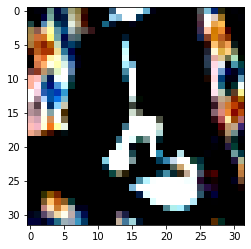

In [7]:
plt.imshow(np.transpose(x[1].numpy(),(1, 2, 0)))

In [8]:
n_channels = 3

> Create a `CNN` for image classification.

In [50]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(n_channels, 64, (3, 3))
    self.conv2 = nn.Conv2d(64, 128, (3, 3))
    self.conv3 = nn.Conv2d(128, 64, (3, 3))

    self._to_linear = None
    self.x = torch.randn(3, 32, 32).view(-1, 3, 32, 32)
    self.conv(self.x)

    self.fc1 = nn.Linear(self._to_linear, 64)
    self.fc2 = nn.Linear(64, 10)

  def conv(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

    if self._to_linear is None:
      self._to_linear = x.shape[1] * x.shape[2] * x.shape[3]

    return x

  def forward(self, x):
    x = self.conv(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    return self.fc2(x)

net = Net().to(device)
net

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [51]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [52]:
def accuracy(y_true, y_pred):
  total = 0
  correct = 0
  net.eval()
  with torch.no_grad():
    correct = list(y_true == y_pred).count(True)
    total = len(y_true)
  net.train()
  return correct/total

In [53]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for idx, (X, y) in enumerate(train_set):
    X = X.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    # forward pass
    outputs = net(X)
    # calc loss
    loss = criterion(outputs, y)
    # backward prop
    loss.backward()
    # update weights
    optimizer.step()
  acc = accuracy(torch.argmax(outputs, dim=1), y)
  print(f"Epochs: {epoch + 1}/{EPOCHS}, loss: {loss.item():.3f}, accurracy: {acc:.3f}")

Epochs: 1/5, batch: 1563, loss: 0.858, accurracy: 0.688
Epochs: 2/5, batch: 1563, loss: 1.494, accurracy: 0.500
Epochs: 3/5, batch: 1563, loss: 1.021, accurracy: 0.500
Epochs: 4/5, batch: 1563, loss: 0.911, accurracy: 0.688
Epochs: 5/5, batch: 1563, loss: 0.337, accurracy: 0.875


In [55]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_set:
    X = data[0].to(device)
    y = data[1].to(device)

    predictions = net(X)
    for i, j in enumerate(predictions):
      predicted_class = torch.argmax(j)
      real_class = y[i]
      if real_class == predicted_class:
        correct +=1
      total +=1
print("Accuracy: ", correct/total)

Accuracy:  0.7081


### Malking predictions.

In [60]:
for X, y in test_set:
  X = X.to(device)
  y = y.to(device)
  pass

In [61]:
torch.argmax(net(X), dim=1), y

(tensor([7, 3, 8, 0, 8, 4, 7, 0, 3, 5, 3, 3, 3, 5, 1, 7], device='cuda:0'),
 tensor([7, 5, 8, 0, 8, 2, 7, 0, 3, 5, 3, 8, 3, 5, 1, 7], device='cuda:0'))

### Saving the model and loading the Model.

#### important methods
 1. ``torch.save(arg, PATH)``
 2. ``torch.load(PATH)``
 3. ``torch.load_state_dict(arg)``

 ### Saving the model way number 1.

1.0 Saving 

 ```python
 model.save(model, path)
 ```
 1.1 Loading
 ```python
 model.load(path)
 ```

In [64]:
path_1 = "model_1.pth"
torch.save(net, path_1)
print("Saved")

Saved


In [67]:
model_1 = torch.load(path_1)
model_1.eval() # or  model.train() very important

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [71]:
### Making predictions
torch.argmax(model_1(X), dim=1)

tensor([7, 3, 8, 0, 8, 4, 7, 0, 3, 5, 3, 3, 3, 5, 1, 7], device='cuda:0')

> Printing the model parameters

In [ ]:
for param in model_1.parameters():
  print(param)
  break

### Saving the model way 2
This is  the recommended way of saving pytorch models.

1. Saving
```python
torch.save(model.state_dict(), PATH)
```
2. Loading
When using this method, the model must be created again. We will show by example.

```python
model = Net()
model.load_state_dict(torch.load(path))
model.eval() # or  model.train() Very important step it tells pytorch that we want to evaluate our model.
```

Saving.

In [74]:
path_2 = "model_2.pth"
torch.save(net.state_dict(), path_2)
print("Saved")

Saved


In [ ]:
print(net.state_dict())

In [ ]:
net_1 = Net()
net_1.load_state_dict(torch.load(path_2))
net_1.eval()
print(net_1.state_dict())

### Creating  and Loading checkpoints

01. Creating a checkpoint
```python
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
checkpoint = {
  "epoch": 13,
  "model_state": model.state_dict(),
  "optim_state": optimizer.state_dict()
}
```

02. Saving a checkpoint

```python
path = "checkpoint_1.pth"
torch.save(checkpoint, path)
```

03. Loading a checkpoint

```python
model = Model()
optimizer = optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
```

Example.


In [86]:
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)
checkpoint = {
"epoch": 14,
"model_state": net.state_dict(),
"optim_state": optimizer.state_dict()
}
path = "checkpoint_1.pth"

In [87]:
torch.save(checkpoint, path)
print("Checkpoint saved.")

Checkpoint saved.


In [88]:
net = Net()
optimizer = optimizer = torch.optim.SGD(net.parameters(), lr=0)
 
checkpoint = torch.load(path)
net_state = net.load_state_dict(checkpoint['model_state'])
optimizer_state = optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

net.eval() # or net.train()

print("Net State: ", net_state)
print("Epoch: ", epoch)
print("Optimizer State: ", optimizer_state)



Net State:  <All keys matched successfully>
Epoch:  14
Optimizer State:  None


#### Saving and Loading models on different devices.

1. Save on GPU, Load on CPU
````python
device = torch.device("cuda")
net.to(device)
torch.save(net.state_dict(), path)
device = torch.device('cpu')
net = Net()
net.load_state_dict(torch.load(path, map_location=device))
````

2. Save on GPU, Load on GPU

````python
device = torch.device("cuda")
net.to(device)

torch.save(net.state_dict(), path)

net = Net()
net.load_state_dict(torch.load(path))

net.to(device)
````

3. Save on CPU, Load on GPU

```python
torch.save(net.state_dict(), path)
device = torch.device("cuda")

net = Net()
net.load_state_dict(torch.load(path, map_location="cuda:0")) 

net.to(device)
```

